In [1]:
import matplotlib
import pandas as pd
from common.outliers import find_outliers_in_multiple_columns, plot_2d_data_with_outliers
from common.standardization import standardize

matplotlib.rcParams['figure.figsize'] = [7, 7]

### Constants and settings

In [2]:
columns_used_for_clustering = ["User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [3]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
data = data.filter(items=columns_used_for_clustering)

### Data stats for each column

In [4]:
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_used_for_clustering})
print(columns_stats.to_string())

          User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales  Year_of_Release
max     9.600000e+00     99.000000  28.960000  41.360000  10.220000      2016.000000
min     8.881784e-16     13.000000   0.000000   0.000000   0.000000      1977.000000
std     1.302502e+00     12.449681   0.622661   1.002670   0.385861         6.070377
mean    7.270068e+00     70.942011   0.225307   0.402908   0.108312      2006.003636
median  7.500000e+00     72.400000   0.070000   0.170000   0.000000      2007.000000


### Data standardization

In [5]:
standardize(data, columns_used_for_clustering, columns_stats)

### Outliers detection

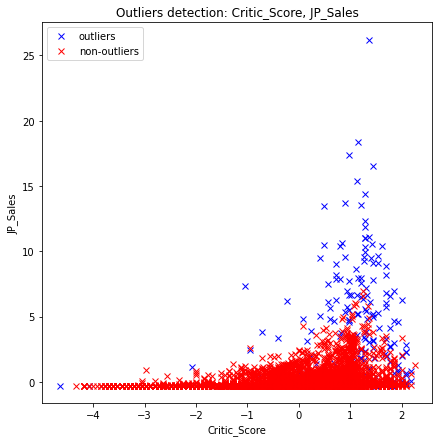

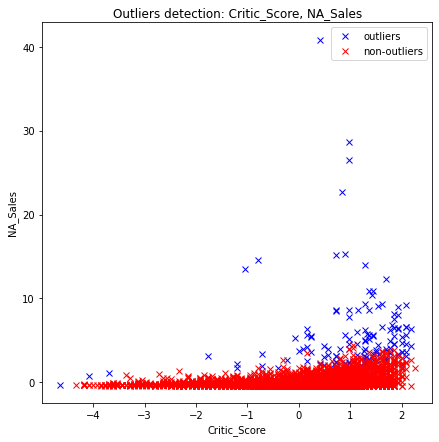

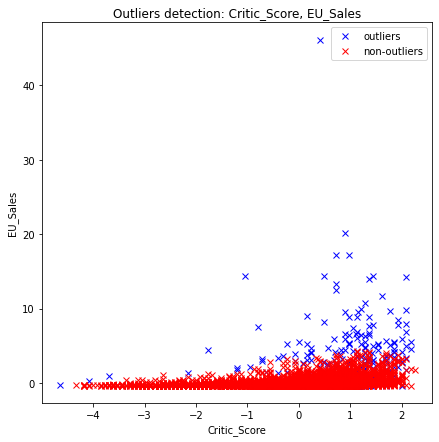

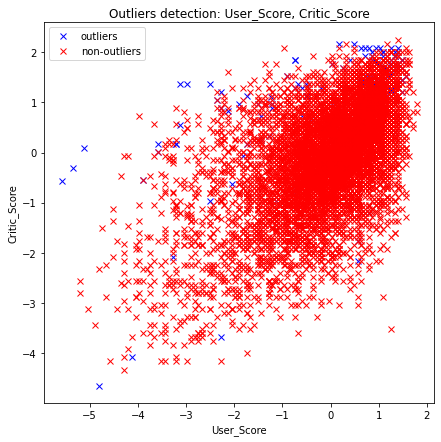

In [6]:
k_neighbours = 5
r_percentage = 0.02
outliers, non_outliers = find_outliers_in_multiple_columns(data, columns_used_for_clustering, k_neighbours, r_percentage)

plot_2d_data_with_outliers(outliers, non_outliers, ("Critic_Score", "JP_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("Critic_Score", "NA_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("Critic_Score", "EU_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("User_Score", "Critic_Score"))

